<a href="https://colab.research.google.com/github/alexfferro/Curso_ML/blob/master/Qualidade_de_vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [116]:
import numpy as np
import pandas as pd

In [117]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

# Sobre
Dataset analisando a qualidade de um vinho. sendo que de acordo com os detalhes do repositorio, caso o vinho possua qualidade de 6,5 ou superior, é um vinho "bom" caso contrario é um vinho "ruim". são classificados entre 0 e 10.
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [118]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [119]:
dados.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
dados.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [120]:
dados = dados.dropna()

In [121]:
import matplotlib.pyplot as plt

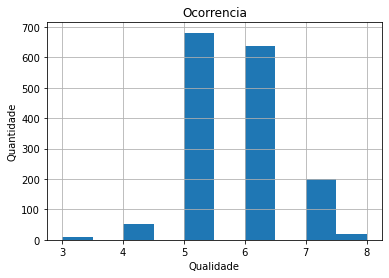

In [122]:
plt.hist(dados['quality'])
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')
plt.title('Gráfico de Qualidade')
plt.grid(True)
plt.show()

In [123]:
dados.quality.mean()

5.6360225140712945

#Qualidade

É perceptivel que a maior parte das instancias estão entre 5 e 6. Pouco mais que 200 instancias podem ser considerados realmente bons vinhos.

In [124]:
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


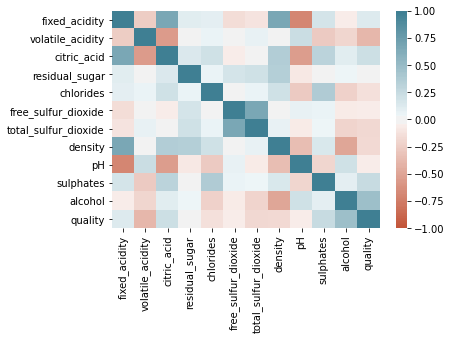

In [125]:
import seaborn as sns

sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

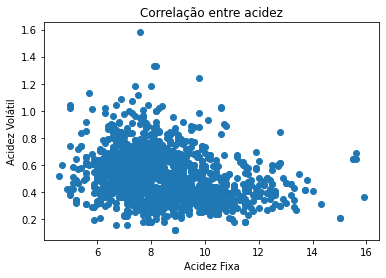

In [139]:
plt.scatter(dados.fixed_acidity,dados.volatile_acidity)
plt.xlabel('Acidez Fixa')
plt.ylabel('Acidez Volátil')
plt.title('Correlação entre acidez')
plt.show()

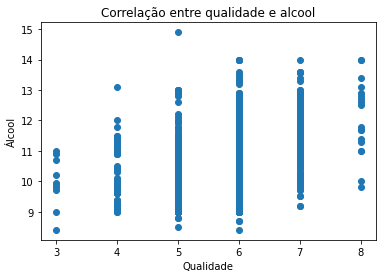

In [146]:
plt.scatter(dados.quality,dados.alcohol)
plt.xlabel('Qualidade')
plt.ylabel('Álcool')
plt.title('Correlação entre Qualidade e alcool')
plt.show()

In [159]:
dados.alcohol.mean()

10.422983114446502

#Correlação entre alguns paramêtros

Após a análise de algumas correlações, uma chamou atenção, em que o teor alcolico de um vinho de boa qualidade estão acima de 10.